In [1]:
# Import basic packages

from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

import seaborn as sns

pd.set_option('display.max_rows', 10)

In [2]:
# Files

train_file = '../input/train.csv'
test_file = '../input/test.csv'

In [3]:
train_and_test_files = (train_file, test_file)
train_df, test_df = [pd.read_csv(f, index_col='PassengerId') for f in (train_file, test_file)]

In [4]:
print('train_df:')
train_df.info()
print('---')
print('test_df:')
test_df.info()

train_df:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
---
test_df:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), obj

In [5]:
Correlation=train_df.corr()
print(pd.DataFrame(Correlation))

correlation_Y = pd.DataFrame(Correlation["Survived"])
correlation_Y.sort_values(by = "Survived", ascending = False)
print(correlation_Y)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000
          Survived
Survived  1.000000
Pclass   -0.338481
Age      -0.077221
SibSp    -0.035322
Parch     0.081629
Fare      0.257307


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71ce0a81d0>,
      dtype=object)

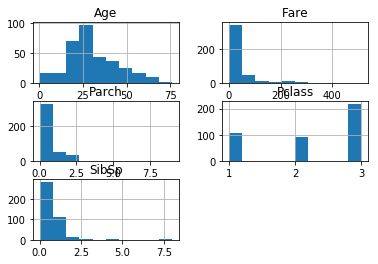

In [6]:
test_df.hist()

# Check which columns are missing
To enhance the completion of data. We should fill the missing data.

In [7]:
unnecessary_columns = ['Ticket', 'Cabin']
train_df = train_df.drop(columns=unnecessary_columns)
test_df = test_df.drop(columns=unnecessary_columns)
merged_df = train_df.append(test_df)

/app/.venv/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [8]:
# Sould check what columns are including NaN
columns_series = merged_df.isnull().any()
columns_with_nan_series = columns_series[columns_series == True]
columns_with_nan = columns_with_nan_series.index.values.tolist()
columns_with_nan

['Age', 'Embarked', 'Fare', 'Survived']

# Fill nan value of Fare column

In [9]:
for c in columns_with_nan:
    subset_df = merged_df[merged_df[c].isnull()]
    row_count = len(subset_df.index)
    print('{} column has {} of row count of NaN data '.format(c, row_count))
    subset_df.head()

Age column has 263 of row count of NaN data 
Embarked column has 2 of row count of NaN data 
Fare column has 1 of row count of NaN data 
Survived column has 418 of row count of NaN data 


In [10]:
p_class_types = merged_df['Pclass'].unique()
p_class_types.sort()
for p_class_type in p_class_types:
    fare_series = merged_df[merged_df['Pclass'] == p_class_type]['Fare']
    median = fare_series.median()
    print('Median fare of {} Pclass is: {}'.format(p_class_type, median))

Median fare of 1 Pclass is: 60.0
Median fare of 2 Pclass is: 15.0458
Median fare of 3 Pclass is: 8.05


In [11]:
for p_class_type in p_class_types:
    fare_series = merged_df[merged_df['Pclass'] == p_class_type]['Fare']
    has_any_null = fare_series.isnull().any()
    if not has_any_null:
        continue

    s = fare_series.isnull()
    filled_series = s[s == True]
    merged_df.loc[filled_series.index, ['Fare']] = fare_series.median()

In [12]:
embarked_count_series = merged_df['Embarked'].value_counts()


# Fill nan value of Age column

In [13]:
median_age = merged_df['Age'].median()
merged_df['Age'] = merged_df['Age'].fillna(median_age)

# Fill nan value of Embarked column

In [14]:
idxmax = merged_df['Embarked'].value_counts().idxmax()
print("Embarked 最常出現:", idxmax)
merged_df['Embarked'] = merged_df['Embarked'].fillna(idxmax)

Embarked 最常出現: S


# Feature engineering about Name

In [15]:
last_name_series = merged_df['Name'].str.split(", ", expand=True)[1]
last_name_series.head(5)

PassengerId
1                               Mr. Owen Harris
2    Mrs. John Bradley (Florence Briggs Thayer)
3                                   Miss. Laina
4            Mrs. Jacques Heath (Lily May Peel)
5                             Mr. William Henry
Name: 1, dtype: object

In [16]:
title_series = last_name_series.str.split('.', expand=True)[0]

In [17]:
merged_df['title'] = title_series
merged_df = merged_df.drop(columns=['Name'])
merged_df.head(5)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,title
PassengerId,,,,,,,,,
1,22.0,S,7.2500,0,3,male,1,0.0,Mr
2,38.0,C,71.2833,0,1,female,1,1.0,Mrs
3,26.0,S,7.9250,0,3,female,0,1.0,Miss
4,35.0,S,53.1000,0,1,female,1,1.0,Mrs
5,35.0,S,8.0500,0,3,male,0,0.0,Mr


In [18]:
pd.crosstab(merged_df['title'], merged_df['Sex']).T.style.background_gradient(cmap='summer_r')

title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [19]:
'''
Please refer here:
Mr. on wiki: https://en.wikipedia.org/wiki/Mr.
Miss on wiki: https://en.wikipedia.org/wiki/Miss
Ms on wiki: https://en.wikipedia.org/wiki/Ms.
'''
title_map = {
    'Capt': 'Mr',
    'Col': 'Mr',
    'Don': 'Mr',
    'Dona': 'Mrs',
    'Dr': 'Mr',
    'Jonkheer': 'Mr',
    'Lady': 'Mrs',
    'Major': 'Mr',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Rev': 'Mr',
    'Sir': 'Mr',
    'the Countess': 'Mrs',
    'Master': 'Mr'}
merged_df['title'] = merged_df['title'].replace(title_map)

In [20]:
dummy = pd.get_dummies(merged_df['title'])
merged_df = pd.concat([merged_df, dummy], axis=1)
merged_df = merged_df.drop(columns=['title'])

In [21]:
merged_df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,
1,22.0,S,7.2500,0,3,male,1,0.0,0,1,0
2,38.0,C,71.2833,0,1,female,1,1.0,0,0,1
3,26.0,S,7.9250,0,3,female,0,1.0,1,0,0
4,35.0,S,53.1000,0,1,female,1,1.0,0,0,1
5,35.0,S,8.0500,0,3,male,0,0.0,0,1,0


# Convert Sex, Embarked and Pclass to 0/1 variables

We should use get_dummies to handle this<br>
Convert categorical variable into dummy/indicator variables

In [22]:
for column in ['Sex', 'Embarked']:
    dummy = pd.get_dummies(merged_df[column])
    merged_df = pd.concat([merged_df, dummy.astype(bool)], axis=1)
    merged_df = merged_df.drop([column], axis=1)
    
dummy = pd.get_dummies(merged_df['Pclass'], prefix='pclass')
merged_df = pd.concat([merged_df, dummy.astype(bool)], axis=1)
merged_df = merged_df.drop(['Pclass'], axis=1)

In [23]:
merged_df.head()

,Age,Fare,Parch,SibSp,Survived,Miss,Mr,Mrs,female,male,C,Q,S,pclass_1,pclass_2,pclass_3
PassengerId,,,,,,,,,,,,,,,,
1,22.0,7.2500,0,1,0.0,0,1,0,False,True,False,False,True,False,False,True
2,38.0,71.2833,0,1,1.0,0,0,1,True,False,True,False,False,True,False,False
3,26.0,7.9250,0,0,1.0,1,0,0,True,False,False,False,True,False,False,True
4,35.0,53.1000,0,1,1.0,0,0,1,True,False,False,False,True,True,False,False
5,35.0,8.0500,0,0,0.0,0,1,0,False,True,False,False,True,False,False,True


# Merge Parch and SibSp into family

In [24]:
merged_df['family'] = merged_df['Parch'] + merged_df['SibSp']
merged_df = merged_df.drop(columns=['Parch', 'SibSp'])
merged_df['family'] = merged_df['family'].astype(int)
merged_df.head()

,Age,Fare,Survived,Miss,Mr,Mrs,female,male,C,Q,S,pclass_1,pclass_2,pclass_3,family
PassengerId,,,,,,,,,,,,,,,
1,22.0,7.2500,0.0,0,1,0,False,True,False,False,True,False,False,True,1
2,38.0,71.2833,1.0,0,0,1,True,False,True,False,False,True,False,False,1
3,26.0,7.9250,1.0,1,0,0,True,False,False,False,True,False,False,True,0
4,35.0,53.1000,1.0,0,0,1,True,False,False,False,True,True,False,False,1
5,35.0,8.0500,0.0,0,1,0,False,True,False,False,True,False,False,True,0


In [25]:
new_train_df = merged_df[pd.notnull(merged_df['Survived'])]

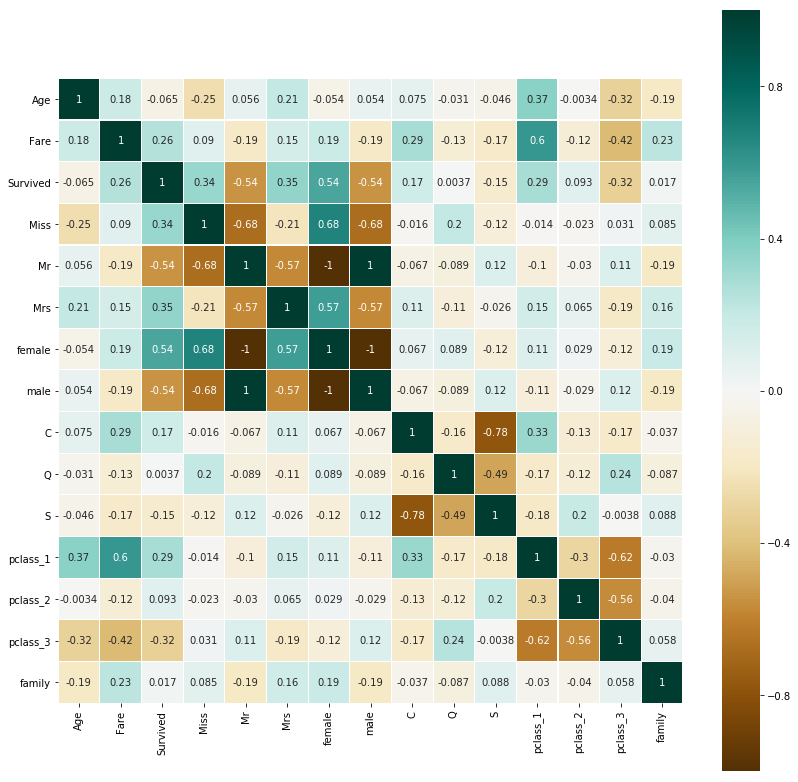

In [26]:
plt.figure(figsize=(14, 14))
sns.heatmap(merged_df.astype(float).corr(), cmap = 'BrBG',
            linewidths=0.1, square=True, linecolor='white',
            annot=True)

# Final

In [27]:
new_train_df = merged_df[merged_df['Survived'].notnull()]
new_test_df = merged_df[merged_df['Survived'].isnull()]

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [29]:
clf = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf,
                        new_train_df.drop(['Survived'], axis=1), 
                        new_train_df['Survived'],
                        cv=10)
scores

array([0.8       , 0.83333333, 0.78651685, 0.84269663, 0.84269663,
       0.7752809 , 0.79775281, 0.78651685, 0.84269663, 0.80681818])

In [30]:
scores.mean()

0.8114308818522302

In [31]:
clf.fit(new_train_df.drop(['Survived'], axis=1), new_train_df['Survived'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(clf,out_file=None,
                    feature_names=new_train_df.drop(['Survived'], axis=1).columns,
                    class_names=["No", "Yes"],
                    filled=True, 
                    rounded=True,
                    special_characters=True)

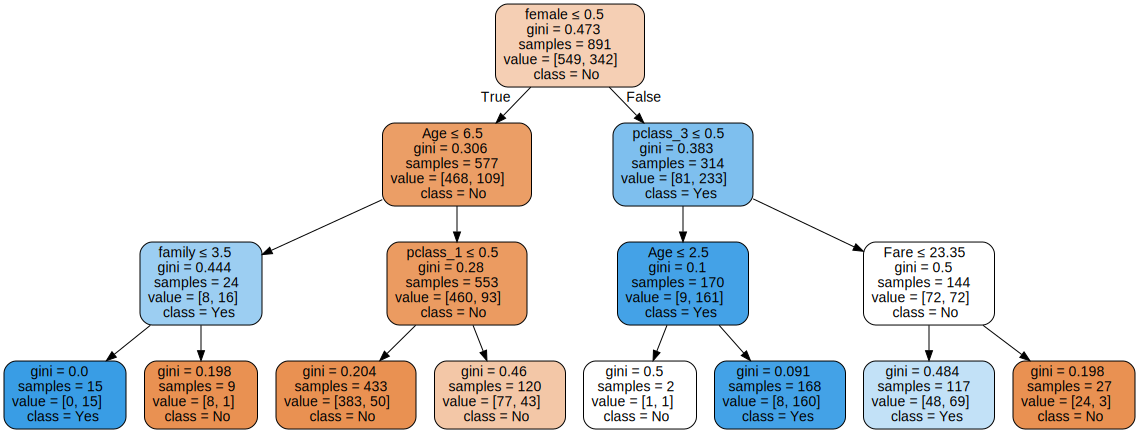

In [33]:
graphviz.Source(g)

In [34]:
pprint(dict(zip(new_train_df.drop(['Survived'], axis=1).columns.tolist(), clf.feature_importances_)))

{'Age': 0.061866895093931874,
 'C': 0.0,
 'Fare': 0.05080151938170098,
 'Miss': 0.0,
 'Mr': 0.0,
 'Mrs': 0.0,
 'Q': 0.0,
 'S': 0.0,
 'family': 0.04492651373891922,
 'female': 0.6288796382731139,
 'male': 0.0,
 'pclass_1': 0.056019708433010074,
 'pclass_2': 0.0,
 'pclass_3': 0.1575057250793241}


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
x_train = new_train_df.drop(['Survived'], axis=1)
x_test = new_train_df['Survived']

In [54]:
scores = []
for n_estimators in range(10, 110, 5):
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf = clf.fit(x_train, x_test)
    score = clf.score(x_train, x_test)
    scores.append(score)

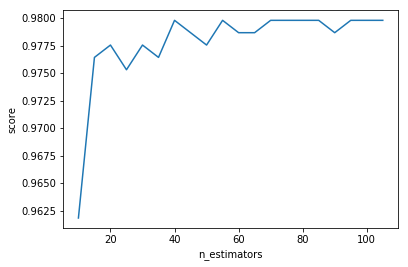

In [55]:
plt.plot(range(10, 110, 5), scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

In [40]:
pprint(dict(zip(range(10, 110, 5), scores)))

{10: 0.9663299663299664,
 15: 0.9685746352413019,
 20: 0.9753086419753086,
 25: 0.9764309764309764,
 30: 0.9775533108866442,
 35: 0.9797979797979798,
 40: 0.978675645342312,
 45: 0.978675645342312,
 50: 0.9797979797979798,
 55: 0.978675645342312,
 60: 0.9797979797979798,
 65: 0.978675645342312,
 70: 0.9797979797979798,
 75: 0.9797979797979798,
 80: 0.9797979797979798,
 85: 0.9797979797979798,
 90: 0.9797979797979798,
 95: 0.9797979797979798,
 100: 0.9797979797979798,
 105: 0.9797979797979798}


In [41]:
scores = []
for n_estimators in range(25, 36):
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf = clf.fit(x_train, x_test)
    score = clf.score(x_train, x_test)
    scores.append(score)

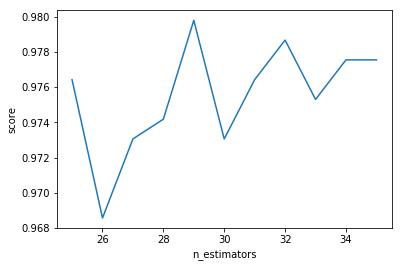

In [42]:
plt.plot(range(25, 36), scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

In [43]:
pprint(dict(zip(range(25, 36), scores)))

{25: 0.9764309764309764,
 26: 0.9685746352413019,
 27: 0.9730639730639731,
 28: 0.9741863075196409,
 29: 0.9797979797979798,
 30: 0.9730639730639731,
 31: 0.9764309764309764,
 32: 0.978675645342312,
 33: 0.9753086419753086,
 34: 0.9775533108866442,
 35: 0.9775533108866442}


In [44]:
scores = []
for max_depth in range(3, 21):
    clf = RandomForestClassifier(n_estimators=26, max_depth=max_depth)
    clf = clf.fit(x_train, x_test)
    score = clf.score(x_train, x_test)
    scores.append(score)

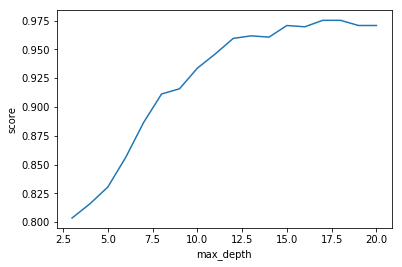

In [45]:
plt.plot(range(3, 21), scores)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [46]:
pprint(dict(zip(range(3, 21), scores)))

{3: 0.8035914702581369,
 4: 0.8159371492704826,
 5: 0.8305274971941639,
 6: 0.856341189674523,
 7: 0.8866442199775533,
 8: 0.9113355780022446,
 9: 0.9158249158249159,
 10: 0.9337822671156004,
 11: 0.9461279461279462,
 12: 0.9595959595959596,
 13: 0.9618406285072951,
 14: 0.9607182940516273,
 15: 0.9708193041526375,
 16: 0.9696969696969697,
 17: 0.9753086419753086,
 18: 0.9753086419753086,
 19: 0.9708193041526375,
 20: 0.9708193041526375}


In [47]:
clf = RandomForestClassifier(n_estimators=26, max_depth=15)
clf = clf.fit(x_train, x_test)

In [48]:
predict_result = clf.predict(new_test_df.drop(['Survived'], axis=1))

In [49]:
new_test_df['Survived'] = predict_result

/app/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
survived = new_test_df.loc[:,['Survived']]
survived['Survived'] = survived['Survived'].astype(int) 
#survived = new_test_df['Survived']

In [51]:
survived.to_csv('submission.csv')